In [1]:
# All includes

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd

import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# for svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [2]:
# Import data

df = pd.read_excel('data.xlsx')

df = df.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'])

#df.head()

In [3]:
# Prepare data

#df.columns

Feeding = df[['Feeding', 'Unnamed: 1', 'Unnamed: 2']]
Feeding = Feeding.dropna()
Feeding.index = pd.RangeIndex(len(Feeding.index))
Feeding = Feeding.drop(0)

Lying = df[['Lying', 'Unnamed: 4', 'Unnamed: 5']]
Lying = Lying.dropna()
Lying.index = pd.RangeIndex(len(Lying.index))
Lying = Lying.drop(0)

Standing = df[['Standing', 'Unnamed: 7', 'Unnamed: 8']]
Standing = Standing.dropna()
Standing.index = pd.RangeIndex(len(Standing.index))
Standing = Standing.drop(0)

Lying_down = df[['Lying down', 'Unnamed: 10', 'Unnamed: 11']]
Lying_down = Lying_down.dropna()
Lying_down.index = pd.RangeIndex(len(Lying_down.index))
Lying_down = Lying_down.drop(0)

Standing_up = df[['Standing up', 'Unnamed: 13', 'Unnamed: 14']]
Standing_up = Standing_up.dropna()
Standing_up.index = pd.RangeIndex(len(Standing_up.index))
Standing_up = Standing_up.drop(0)

Normal_walking = df[['Normal walking', 'Unnamed: 16', 'Unnamed: 17']]
Normal_walking = Normal_walking.dropna()
Normal_walking.index = pd.RangeIndex(len(Normal_walking.index))
Normal_walking = Normal_walking.drop(0)

Active_walking = df[['Active walking', 'Unnamed: 19', 'Unnamed: 20']]
Active_walking = Active_walking.dropna()
Active_walking.index = pd.RangeIndex(len(Active_walking.index))
Active_walking = Active_walking.drop(0)

#Active_walking.columns

In [4]:
## compute feature database 1st:
window_size = 16
stride = 6

Feeding_data_list = [Feeding[i:i+window_size] for i in range(0, len(Feeding), stride) if i+window_size<=len(Feeding)]

Lying_data_list = [Lying[i:i+window_size] for i in range(0, len(Lying), stride) if i+window_size<=len(Lying)]

Lying_down_data_list = [Lying_down[i:i+window_size] for i in range(0, len(Lying_down), stride) if i+window_size<=len(Lying_down)]

Standing_data_list = [Standing[i:i+window_size] for i in range(0, len(Standing), stride) if i+window_size<=len(Standing)]

Standing_up_data_list = [Standing_up[i:i+window_size] for i in range(0, len(Standing_up), stride) if i+window_size<=len(Standing_up)]

Normal_walking_data_list = [Normal_walking[i:i+window_size] for i in range(0, len(Normal_walking), stride) if i+window_size<=len(Normal_walking)]

Active_walking_data_list = [Active_walking[i:i+window_size] for i in range(0, len(Active_walking), stride) if i+window_size<=len(Active_walking)]


In [5]:
#Active_walking_data_list[0:100]

mydataset = []
mylable = []
for acts in Feeding_data_list:
    mydataset.append(acts)
    mylable.append(0)

for acts in Lying_data_list:
    mydataset.append(acts)
    mylable.append(1)
    
for acts in Standing_data_list:
    mydataset.append(acts)
    mylable.append(2)
    
for acts in Lying_down_data_list:
    mydataset.append(acts)
    mylable.append(3)
    
for acts in Standing_up_data_list:
    mydataset.append(acts)
    mylable.append(4)

for acts in Normal_walking_data_list:
    mydataset.append(acts)
    mylable.append(5)

for acts in Active_walking_data_list:
    mydataset.append(acts)
    mylable.append(6)
    
len(mydataset)
len(mylable)


3671

3671

In [6]:
#useless code below :<

X_train, X_test,y_train, y_test = train_test_split(mydataset, mylable, test_size=0.4, random_state=0)
len(X_train)
len(y_train)
y_train[1:10]

2202

2202

[1, 1, 0, 0, 5, 1, 5, 5, 1]

In [16]:
from scipy import signal

def feature_mean(at, fs):
    feat = np.zeros(3)
    #feat = []
    x = np.array(at.iloc[:,0], dtype=np.float64)   # x acceleration component
    y = np.array(at.iloc[:,1], dtype=np.float64)   # y
    z = np.array(at.iloc[:,2], dtype=np.float64)   # z
    #print(len(x))
    # Average value in signal buffer for all three acceleration components (1 each)    
    means = [np.mean(i) for i in [x, y, z]]
    feat[0:3] = means
    return feat

def feature_rms(at, fs):    
    feat = np.zeros(3)
    #feat = []
    x = np.array(at.iloc[:,0], dtype=np.float64)   # x acceleration component
    y = np.array(at.iloc[:,1], dtype=np.float64)   # y
    z = np.array(at.iloc[:,2], dtype=np.float64)   # z
    # RMS value in signal buffer for all three acceleration components (1 each)
    rms = [np.sqrt(np.mean(i**2)) for i in [x, y, z]]
    feat[0:3] = rms
    return feat

def feature_std(at, fs):    
    feat = np.zeros(3)
    #feat = []
    x = np.array(at.iloc[:,0], dtype=np.float64)   # x acceleration component
    y = np.array(at.iloc[:,1], dtype=np.float64)   # y
    z = np.array(at.iloc[:,2], dtype=np.float64)   # z
    # Standard deviation
    std = [np.std(i) for i in [x, y, z]]
    feat[0:3] = std
    return feat
    
def feature_var(at, fs):    
    feat = np.zeros(3)
    #feat = []
    x = np.array(at.iloc[:,0], dtype=np.float64)   # x acceleration component
    y = np.array(at.iloc[:,1], dtype=np.float64)   # y
    z = np.array(at.iloc[:,2], dtype=np.float64)   # z    
    # Variance
    var = [np.var(i) for i in [x, y, z]]
    feat[0:3] = var
    return feat

def feature_med(at, fs):    
    feat = np.zeros(3)
    #feat = []
    x = np.array(at.iloc[:,0], dtype=np.float64)   # x acceleration component
    y = np.array(at.iloc[:,1], dtype=np.float64)   # y
    z = np.array(at.iloc[:,2], dtype=np.float64)   # z
    # Median
    med = [np.median(i) for i in [x, y, z]]
    feat[0:3] = med
    return feat

def feature_range(at, fs):    
    feat = np.zeros(6)
    #feat = []
    x = np.array(at.iloc[:,0], dtype=np.float64)   # x acceleration component
    y = np.array(at.iloc[:,1], dtype=np.float64)   # y
    z = np.array(at.iloc[:,2], dtype=np.float64)   # z
    # Range
    Range1 = [ np.amin(i) for i in [x, y, z]]    
    feat[0:3] = Range1
    Range2 = [ np.amax(i) for i in [x, y, z]]    
    feat[3:6] = Range2
    return feat

def feature_energy(at, fs):    
    feat = np.zeros(6)
    #feat = []
    x = np.array(at.iloc[:,0], dtype=np.float64)   # x acceleration component
    y = np.array(at.iloc[:,1], dtype=np.float64)   # y
    z = np.array(at.iloc[:,2], dtype=np.float64)   # z
    
    # Energy
    r0 = np.array(at.iloc[0,:], dtype=np.float64)   # 
    r1 = np.array(at.iloc[1,:], dtype=np.float64)   # 
    r2 = np.array(at.iloc[2,:], dtype=np.float64)   # 
    r3 = np.array(at.iloc[3,:], dtype=np.float64)   #  
    r4 = np.array(at.iloc[4,:], dtype=np.float64)   # 
    r5 = np.array(at.iloc[5,:], dtype=np.float64)   # 
    energy = [ sum(i**2) for i in [r0, r1, r2, r3, r4, r5]]
    feat[0:6] = energy
    return feat
    
    
#from adspy_shared_utilities import plot_labelled_scatter
# version 1.0
import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches


def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)
    print(num_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#000000', '#00AAFF', '#FF00AA', '#00FF4C', '#ff0000', '#6e8216', '#ff6e00']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(numpy.arange(0, num_labels+1, 1), ncolors=num_labels)
    #f = plt.figure(figsize=(10, 10))
    plt.figure(figsize=(9, 9))

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, lw=1)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)
    
    #plt.xlabel('First t-SNE feature')
    #plt.ylabel('Second t-SNE feature')
    #plt.title('Cow dataset representation after feature extraction', fontsize=20);

    plt.show()
    

2202

1469

Decision Tree stuffs:
Accuracy of Decision Tree classifier on training set: 0.652
Accuracy of Decision Tree classifier on test set: 0.648


Decision Tree DTBD stuffs:
Accuracy of GBDT classifier on training set: 0.976
Accuracy of GBDT classifier on test set: 0.675


SVM stuffs:
Accuracy on training set: 0.69
Accuracy on test set: 0.70


 Random Forests stuffs: 
Accuracy of RF classifier on training set: 0.970
Accuracy of RF classifier on test set: 0.677


 KNeighbor stuffs: 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.68


for trainning: 
7


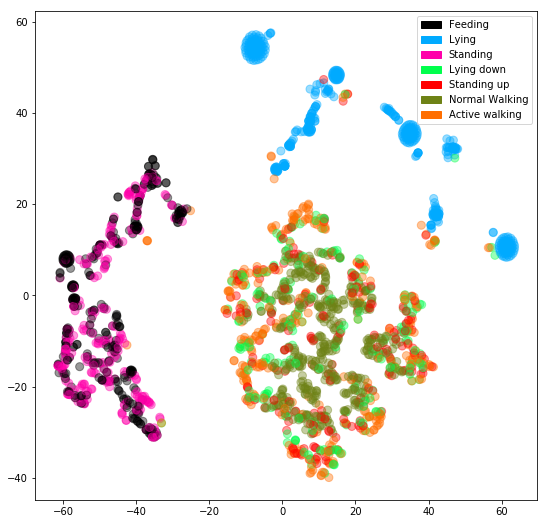



for testing: 
7


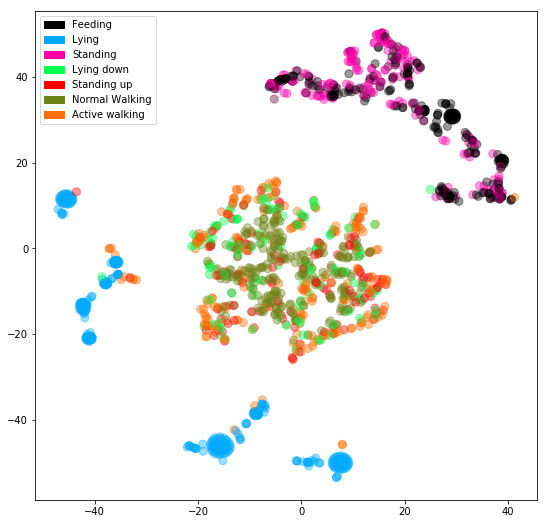

In [17]:
# Mean
train_features = []
test_features = []
for action in X_train:
    feat = feature_mean(action, 1)
    train_features.append(feat)

for action in X_test:
    feat = feature_mean(action, 1)
    test_features.append(feat)
    
len(train_features)
len(test_features)

print("Decision Tree stuffs:")
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree

clf2 = DecisionTreeClassifier(max_depth=4).fit(train_features, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.3f}'
     .format(clf2.score(train_features, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
     .format(clf2.score(test_features, y_test)))



print("\n\nDecision Tree DTBD stuffs:")
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(learning_rate=0.18585, max_depth=5).fit(train_features, y_train)

print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(clf1.score(train_features, y_train)))
print('Accuracy of GBDT classifier on test set: {:.3f}'
     .format(clf1.score(test_features, y_test)))


print("\n\nSVM stuffs:")
this_C = 100
clf = SVC(C=this_C, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False).fit(train_features, y_train)
print("Accuracy on training set: {:.2f}".format(clf.score(train_features, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(test_features, y_test)))


print('\n\n Random Forests stuffs: ')
from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier(n_estimators=15, random_state=0).fit(train_features, y_train)

print('Accuracy of RF classifier on training set: {:.3f}'
     .format(clf5.score(train_features, y_train)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(clf5.score(test_features, y_test)))


print('\n\n KNeighbor stuffs: ')
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_features, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(train_features, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(test_features, y_test)))


x1 = train_features
y1 = y_train
x2 = test_features
y2 = y_test

n_samples = 300
n_components = 2
perplexity = 30
RS = 1000

from sklearn.manifold import TSNE

#tsne = TSNE(n_components=n_components, init='random',
#                         random_state=RS, perplexity=perplexity)
print("\n\nfor trainning: ")
X_tsne1 = TSNE(random_state=RS).fit_transform(x1)

plot_labelled_scatter(X_tsne1, y1,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])


print("\n\nfor testing: ")
X_tsne2 = TSNE(random_state=RS).fit_transform(x2)

plot_labelled_scatter(X_tsne2, y2,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])



2202

1469

Decision Tree stuffs:
Accuracy of Decision Tree classifier on training set: 0.772
Accuracy of Decision Tree classifier on test set: 0.787


Decision Tree DTBD stuffs:
Accuracy of GBDT classifier on training set: 0.977
Accuracy of GBDT classifier on test set: 0.822


SVM stuffs:
Accuracy on training set: 0.81
Accuracy on test set: 0.82


 Random Forests stuffs: 
Accuracy of RF classifier on training set: 0.974
Accuracy of RF classifier on test set: 0.829


 KNeighbor stuffs: 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.82


for trainning: 
7


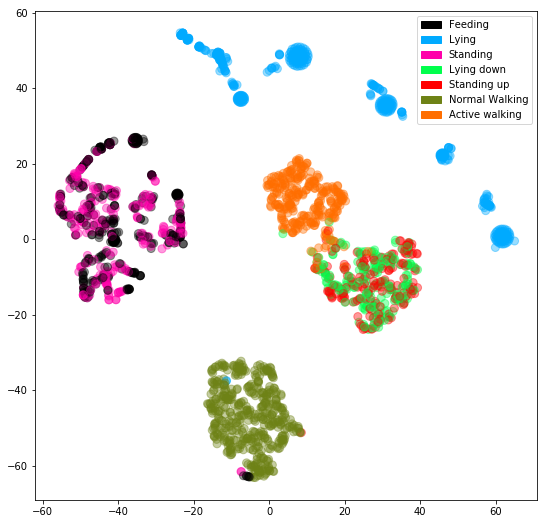



for testing: 
7


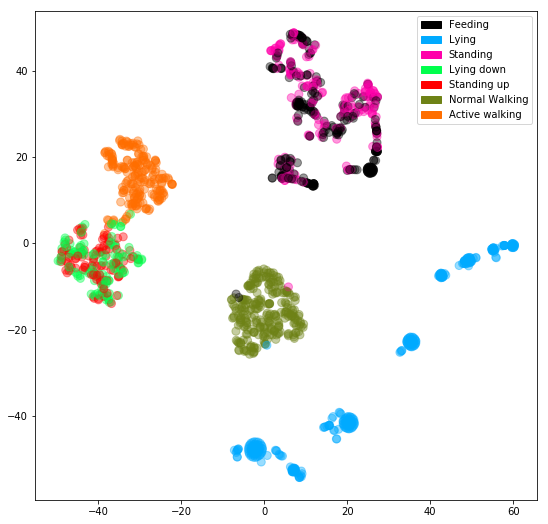

In [18]:
#RMS

train_features = []
test_features = []
for action in X_train:
    feat = feature_rms(action, 1)
    train_features.append(feat)

for action in X_test:
    feat = feature_rms(action, 1)
    test_features.append(feat)
    
len(train_features)
len(test_features)

print("Decision Tree stuffs:")
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree

clf2 = DecisionTreeClassifier(max_depth=4).fit(train_features, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.3f}'
     .format(clf2.score(train_features, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
     .format(clf2.score(test_features, y_test)))



print("\n\nDecision Tree DTBD stuffs:")
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(learning_rate=0.18585, max_depth=5).fit(train_features, y_train)

print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(clf1.score(train_features, y_train)))
print('Accuracy of GBDT classifier on test set: {:.3f}'
     .format(clf1.score(test_features, y_test)))


print("\n\nSVM stuffs:")
this_C = 100
clf = SVC(C=this_C, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False).fit(train_features, y_train)
print("Accuracy on training set: {:.2f}".format(clf.score(train_features, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(test_features, y_test)))


print('\n\n Random Forests stuffs: ')
from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier(n_estimators=15, random_state=0).fit(train_features, y_train)

print('Accuracy of RF classifier on training set: {:.3f}'
     .format(clf5.score(train_features, y_train)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(clf5.score(test_features, y_test)))


print('\n\n KNeighbor stuffs: ')
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_features, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(train_features, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(test_features, y_test)))


x1 = train_features
y1 = y_train
x2 = test_features
y2 = y_test

n_samples = 300
n_components = 2
perplexity = 30
RS = 1000

from sklearn.manifold import TSNE

#tsne = TSNE(n_components=n_components, init='random',
#                         random_state=RS, perplexity=perplexity)
print("\n\nfor trainning: ")
X_tsne1 = TSNE(random_state=RS).fit_transform(x1)

plot_labelled_scatter(X_tsne1, y1,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])


print("\n\nfor testing: ")
X_tsne2 = TSNE(random_state=RS).fit_transform(x2)

plot_labelled_scatter(X_tsne2, y2,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])



2202

1469

Decision Tree stuffs:
Accuracy of Decision Tree classifier on training set: 0.691
Accuracy of Decision Tree classifier on test set: 0.649


Decision Tree DTBD stuffs:
Accuracy of GBDT classifier on training set: 0.958
Accuracy of GBDT classifier on test set: 0.755


SVM stuffs:
Accuracy on training set: 0.87
Accuracy on test set: 0.74


 Random Forests stuffs: 
Accuracy of RF classifier on training set: 0.955
Accuracy of RF classifier on test set: 0.758


 KNeighbor stuffs: 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.74


for trainning: 
7


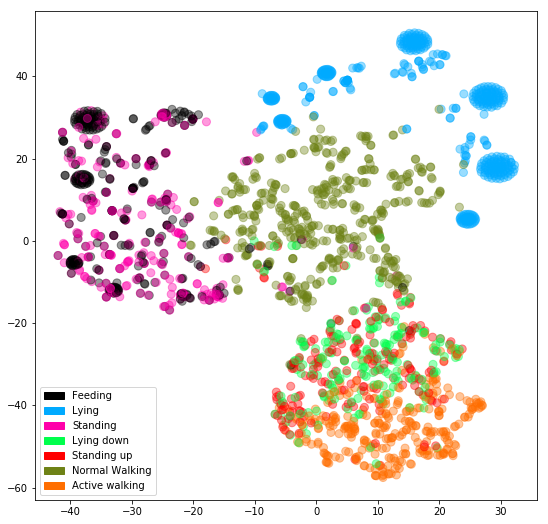



for testing: 
7


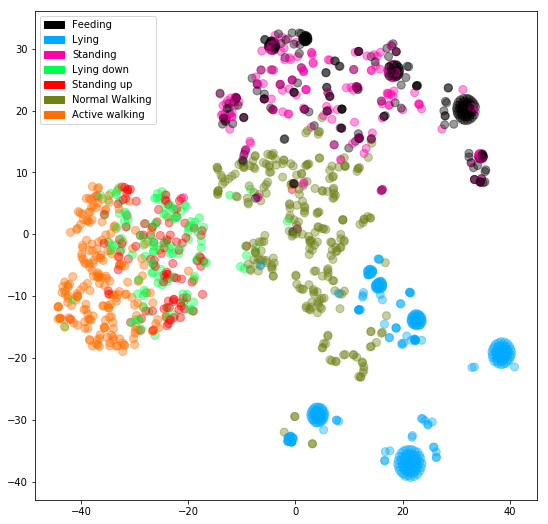

In [19]:
#Energy

train_features = []
test_features = []
for action in X_train:
    feat = feature_energy(action, 1)
    train_features.append(feat)

for action in X_test:
    feat = feature_energy(action, 1)
    test_features.append(feat)
    
len(train_features)
len(test_features)

print("Decision Tree stuffs:")
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree

clf2 = DecisionTreeClassifier(max_depth=4).fit(train_features, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.3f}'
     .format(clf2.score(train_features, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
     .format(clf2.score(test_features, y_test)))



print("\n\nDecision Tree DTBD stuffs:")
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(learning_rate=0.18585, max_depth=5).fit(train_features, y_train)

print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(clf1.score(train_features, y_train)))
print('Accuracy of GBDT classifier on test set: {:.3f}'
     .format(clf1.score(test_features, y_test)))


print("\n\nSVM stuffs:")
this_C = 100
clf = SVC(C=this_C, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False).fit(train_features, y_train)
print("Accuracy on training set: {:.2f}".format(clf.score(train_features, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(test_features, y_test)))


print('\n\n Random Forests stuffs: ')
from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier(n_estimators=15, random_state=0).fit(train_features, y_train)

print('Accuracy of RF classifier on training set: {:.3f}'
     .format(clf5.score(train_features, y_train)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(clf5.score(test_features, y_test)))


print('\n\n KNeighbor stuffs: ')
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_features, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(train_features, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(test_features, y_test)))


x1 = train_features
y1 = y_train
x2 = test_features
y2 = y_test

n_samples = 300
n_components = 2
perplexity = 30
RS = 1000

from sklearn.manifold import TSNE

#tsne = TSNE(n_components=n_components, init='random',
#                         random_state=RS, perplexity=perplexity)
print("\n\nfor trainning: ")
X_tsne1 = TSNE(random_state=RS).fit_transform(x1)

plot_labelled_scatter(X_tsne1, y1,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])


print("\n\nfor testing: ")
X_tsne2 = TSNE(random_state=RS).fit_transform(x2)

plot_labelled_scatter(X_tsne2, y2,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])



2202

1469

Decision Tree stuffs:
Accuracy of Decision Tree classifier on training set: 0.723
Accuracy of Decision Tree classifier on test set: 0.700


Decision Tree DTBD stuffs:
Accuracy of GBDT classifier on training set: 0.905
Accuracy of GBDT classifier on test set: 0.705


SVM stuffs:
Accuracy on training set: 0.70
Accuracy on test set: 0.68


 Random Forests stuffs: 
Accuracy of RF classifier on training set: 0.898
Accuracy of RF classifier on test set: 0.716


 KNeighbor stuffs: 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.74


for trainning: 
7


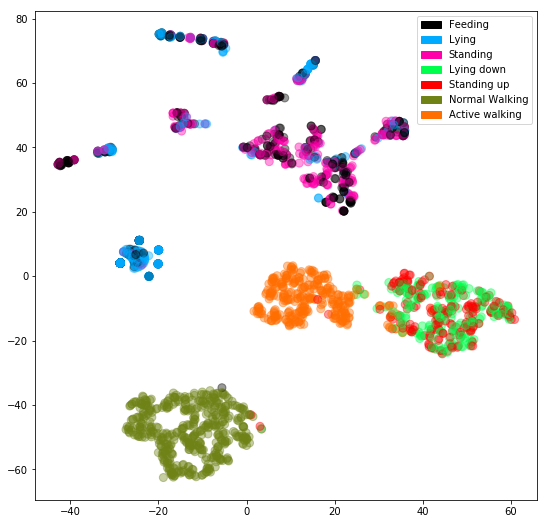



for testing: 
7


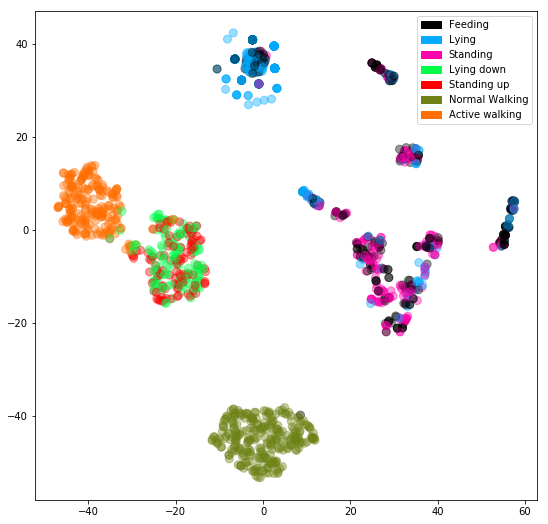

In [20]:
#STD

train_features = []
test_features = []
for action in X_train:
    feat = feature_std(action, 1)
    train_features.append(feat)

for action in X_test:
    feat = feature_std(action, 1)
    test_features.append(feat)
    
len(train_features)
len(test_features)

print("Decision Tree stuffs:")
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree

clf2 = DecisionTreeClassifier(max_depth=4).fit(train_features, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.3f}'
     .format(clf2.score(train_features, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
     .format(clf2.score(test_features, y_test)))



print("\n\nDecision Tree DTBD stuffs:")
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(learning_rate=0.18585, max_depth=5).fit(train_features, y_train)

print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(clf1.score(train_features, y_train)))
print('Accuracy of GBDT classifier on test set: {:.3f}'
     .format(clf1.score(test_features, y_test)))


print("\n\nSVM stuffs:")
this_C = 100
clf = SVC(C=this_C, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False).fit(train_features, y_train)
print("Accuracy on training set: {:.2f}".format(clf.score(train_features, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(test_features, y_test)))


print('\n\n Random Forests stuffs: ')
from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier(n_estimators=10, random_state=0).fit(train_features, y_train)

print('Accuracy of RF classifier on training set: {:.3f}'
     .format(clf5.score(train_features, y_train)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(clf5.score(test_features, y_test)))


print('\n\n KNeighbor stuffs: ')
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_features, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(train_features, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(test_features, y_test)))


x1 = train_features
y1 = y_train
x2 = test_features
y2 = y_test

n_samples = 300
n_components = 2
perplexity = 30
RS = 1000

from sklearn.manifold import TSNE

#tsne = TSNE(n_components=n_components, init='random',
#                         random_state=RS, perplexity=perplexity)
print("\n\nfor trainning: ")
X_tsne1 = TSNE(random_state=RS).fit_transform(x1)

plot_labelled_scatter(X_tsne1, y1,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])


print("\n\nfor testing: ")
X_tsne2 = TSNE(random_state=RS).fit_transform(x2)

plot_labelled_scatter(X_tsne2, y2,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])



2202

1469

Decision Tree stuffs:
Accuracy of Decision Tree classifier on training set: 0.723
Accuracy of Decision Tree classifier on test set: 0.699


Decision Tree DTBD stuffs:
Accuracy of GBDT classifier on training set: 0.905
Accuracy of GBDT classifier on test set: 0.705


SVM stuffs:
Accuracy on training set: 0.65
Accuracy on test set: 0.63


 Random Forests stuffs: 
Accuracy of RF classifier on training set: 0.901
Accuracy of RF classifier on test set: 0.724


 KNeighbor stuffs: 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Accuracy of K-NN classifier on training set: 0.814
Accuracy of K-NN classifier on test set: 0.726


for trainning: 
7


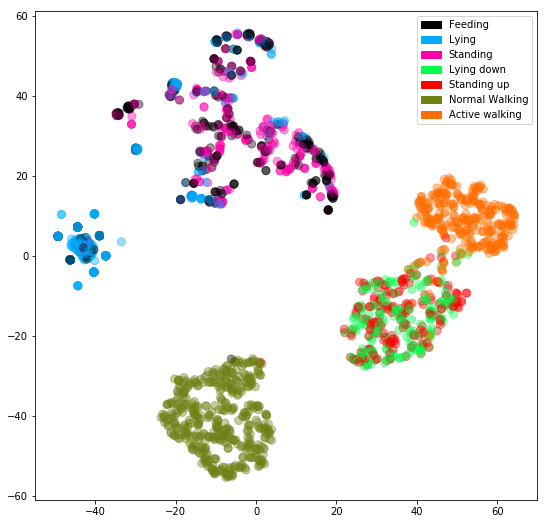



for testing: 
7


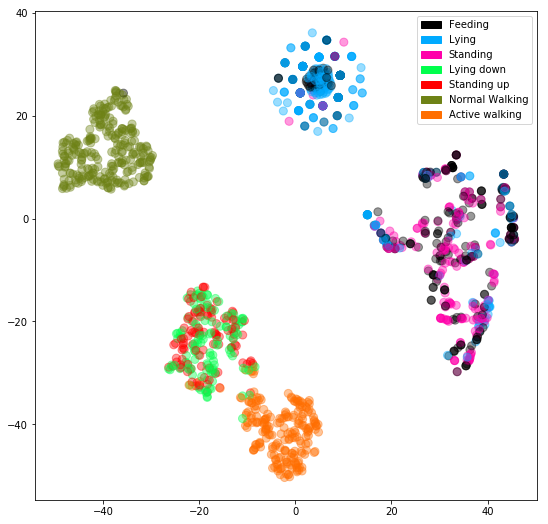

In [21]:
#VAR

train_features = []
test_features = []
for action in X_train:
    feat = feature_var(action, 1)
    train_features.append(feat)

for action in X_test:
    feat = feature_var(action, 1)
    test_features.append(feat)
    
len(train_features)
len(test_features)

print("Decision Tree stuffs:")
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree

clf2 = DecisionTreeClassifier(max_depth=4).fit(train_features, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.3f}'
     .format(clf2.score(train_features, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
     .format(clf2.score(test_features, y_test)))



print("\n\nDecision Tree DTBD stuffs:")
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(learning_rate=0.18585, max_depth=5).fit(train_features, y_train)

print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(clf1.score(train_features, y_train)))
print('Accuracy of GBDT classifier on test set: {:.3f}'
     .format(clf1.score(test_features, y_test)))


print("\n\nSVM stuffs:")
this_C = 100
clf = SVC(C=this_C, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False).fit(train_features, y_train)
print("Accuracy on training set: {:.2f}".format(clf.score(train_features, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(test_features, y_test)))


print('\n\n Random Forests stuffs: ')
from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier(n_estimators=15, random_state=0).fit(train_features, y_train)

print('Accuracy of RF classifier on training set: {:.3f}'
     .format(clf5.score(train_features, y_train)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(clf5.score(test_features, y_test)))


print('\n\n KNeighbor stuffs: ')
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_features, y_train)
print('Accuracy of K-NN classifier on training set: {:.3f}'
     .format(knn.score(train_features, y_train)))
print('Accuracy of K-NN classifier on test set: {:.3f}'
     .format(knn.score(test_features, y_test)))


x1 = train_features
y1 = y_train
x2 = test_features
y2 = y_test

n_samples = 300
n_components = 2
perplexity = 30
RS = 1000

from sklearn.manifold import TSNE

#tsne = TSNE(n_components=n_components, init='random',
#                         random_state=RS, perplexity=perplexity)
print("\n\nfor trainning: ")
X_tsne1 = TSNE(random_state=RS).fit_transform(x1)

plot_labelled_scatter(X_tsne1, y1,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])


print("\n\nfor testing: ")
X_tsne2 = TSNE(random_state=RS).fit_transform(x2)

plot_labelled_scatter(X_tsne2, y2,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])



In [ ]:
#MED

train_features = []
test_features = []
for action in X_train:
    feat = feature_med(action, 1)
    train_features.append(feat)

for action in X_test:
    feat = feature_med(action, 1)
    test_features.append(feat)
    
len(train_features)
len(test_features)

print("Decision Tree stuffs:")
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree

clf2 = DecisionTreeClassifier(max_depth=4).fit(train_features, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.3f}'
     .format(clf2.score(train_features, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
     .format(clf2.score(test_features, y_test)))



print("\n\nDecision Tree DTBD stuffs:")
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(learning_rate=0.18585, max_depth=5).fit(train_features, y_train)

print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(clf1.score(train_features, y_train)))
print('Accuracy of GBDT classifier on test set: {:.3f}'
     .format(clf1.score(test_features, y_test)))


print("\n\nSVM stuffs:")
this_C = 100
clf = SVC(C=this_C, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False).fit(train_features, y_train)
print("Accuracy on training set: {:.2f}".format(clf.score(train_features, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(test_features, y_test)))


print('\n\n Random Forests stuffs: ')
from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier(n_estimators=15, random_state=0).fit(train_features, y_train)

print('Accuracy of RF classifier on training set: {:.3f}'
     .format(clf5.score(train_features, y_train)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(clf5.score(test_features, y_test)))


print('\n\n KNeighbor stuffs: ')
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_features, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(train_features, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(test_features, y_test)))


x1 = train_features
y1 = y_train
x2 = test_features
y2 = y_test

n_samples = 300
n_components = 2
perplexity = 30
RS = 1000

from sklearn.manifold import TSNE

#tsne = TSNE(n_components=n_components, init='random',
#                         random_state=RS, perplexity=perplexity)
print("\n\nfor trainning: ")
X_tsne1 = TSNE(random_state=RS).fit_transform(x1)

plot_labelled_scatter(X_tsne1, y1,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])


print("\n\nfor testing: ")
X_tsne2 = TSNE(random_state=RS).fit_transform(x2)

plot_labelled_scatter(X_tsne2, y2,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])



2202

1469

Decision Tree stuffs:
Accuracy of Decision Tree classifier on training set: 0.642
Accuracy of Decision Tree classifier on test set: 0.645


Decision Tree DTBD stuffs:
Accuracy of GBDT classifier on training set: 0.866
Accuracy of GBDT classifier on test set: 0.655


SVM stuffs:
Accuracy on training set: 0.69
Accuracy on test set: 0.70


 Random Forests stuffs: 
Accuracy of RF classifier on training set: 0.874
Accuracy of RF classifier on test set: 0.650


 KNeighbor stuffs: 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Accuracy of K-NN classifier on training set: 0.72
Accuracy of K-NN classifier on test set: 0.67


for trainning: 


In [ ]:
#RANGE

train_features = []
test_features = []
for action in X_train:
    feat = feature_range(action, 1)
    train_features.append(feat)

for action in X_test:
    feat = feature_range(action, 1)
    test_features.append(feat)
    
len(train_features)
len(test_features)

print("Decision Tree stuffs:")
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree

clf2 = DecisionTreeClassifier(max_depth=4).fit(train_features, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.3f}'
     .format(clf2.score(train_features, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
     .format(clf2.score(test_features, y_test)))



print("\n\nDecision Tree DTBD stuffs:")
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(learning_rate=0.18585, max_depth=5).fit(train_features, y_train)

print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(clf1.score(train_features, y_train)))
print('Accuracy of GBDT classifier on test set: {:.3f}'
     .format(clf1.score(test_features, y_test)))


print("\n\nSVM stuffs:")
this_C = 100
clf = SVC(C=this_C, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False).fit(train_features, y_train)
print("Accuracy on training set: {:.2f}".format(clf.score(train_features, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(test_features, y_test)))


print('\n\n Random Forests stuffs: ')
from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier(n_estimators=15, random_state=0).fit(train_features, y_train)

print('Accuracy of RF classifier on training set: {:.3f}'
     .format(clf5.score(train_features, y_train)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(clf5.score(test_features, y_test)))


print('\n\n KNeighbor stuffs: ')
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_features, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(train_features, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(test_features, y_test)))


x1 = train_features
y1 = y_train
x2 = test_features
y2 = y_test

n_samples = 300
n_components = 2
perplexity = 30
RS = 1000

from sklearn.manifold import TSNE

#tsne = TSNE(n_components=n_components, init='random',
#                         random_state=RS, perplexity=perplexity)
print("\n\nfor trainning: ")
X_tsne1 = TSNE(random_state=RS).fit_transform(x1)

plot_labelled_scatter(X_tsne1, y1,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])


print("\n\nfor testing: ")
X_tsne2 = TSNE(random_state=RS).fit_transform(x2)

plot_labelled_scatter(X_tsne2, y2,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])



In [ ]:
from sklearn.feature_selection import RFE
from scipy import signal
# make color
import seaborn as sns
from matplotlib import cm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def featuresFromBuffer(at, fs):
    feat = np.zeros(21)
    #feat = []
    x = np.array(at.iloc[:,0], dtype=np.float64)   # x acceleration component
    y = np.array(at.iloc[:,1], dtype=np.float64)   # y
    z = np.array(at.iloc[:,2], dtype=np.float64)   # z
    #print(len(x))
    # Average value in signal buffer for all three acceleration components (1 each)    
    means = [np.mean(i) for i in [x, y, z]]
    #feat[0:3] = means
    
    # RMS value in signal buffer for all three acceleration components (1 each)
    rms = [np.sqrt(np.mean(i**2)) for i in [x, y, z]]
    feat[3:6] = rms
    
    # Standard deviation
    std = [np.std(i) for i in [x, y, z]]
    #feat[6:9] = std
    
    # Variance
    var = [np.var(i) for i in [x, y, z]]
    feat[9:12] = var
    
    # Median
    med = [np.median(i) for i in [x, y, z]]
    #feat[12:15] = med
    
    # Range
    Range1 = [ np.amin(i) for i in [x, y, z]]    
    feat[15:18] = Range1
    Range2 = [ np.amax(i) for i in [x, y, z]]    
    feat[18:21] = Range2

    return feat
    

train_features = []
test_features = []
for action in X_train:
    feat = featuresFromBuffer(action, 1)
    train_features.append(feat)

for action in X_test:
    feat = featuresFromBuffer(action, 1)
    test_features.append(feat)
    
len(train_features)
len(test_features)

print("Decision Tree stuffs:")
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree

clf2 = DecisionTreeClassifier(max_depth=4).fit(train_features, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.3f}'
     .format(clf2.score(train_features, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
     .format(clf2.score(test_features, y_test)))



print("\n\nDecision Tree DTBD stuffs:")
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(learning_rate=0.18585, max_depth=5).fit(train_features, y_train)

print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(clf1.score(train_features, y_train)))
print('Accuracy of GBDT classifier on test set: {:.3f}'
     .format(clf1.score(test_features, y_test)))


print("\n\nSVM stuffs:")
this_C = 100
clf = SVC(C=this_C, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False).fit(train_features, y_train)
print("Accuracy on training set: {:.2f}".format(clf.score(train_features, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(test_features, y_test)))


print('\n\n Random Forests stuffs: ')
from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier(n_estimators=15, random_state=0).fit(train_features, y_train)

print('Accuracy of RF classifier on training set: {:.3f}'
     .format(clf5.score(train_features, y_train)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(clf5.score(test_features, y_test)))


print('\n\n KNeighbor stuffs: ')
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_features, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(train_features, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(test_features, y_test)))

x1 = train_features
y1 = y_train
x2 = test_features
y2 = y_test

n_samples = 300
n_components = 2
perplexity = 30
RS = 1000

from sklearn.manifold import TSNE

#tsne = TSNE(n_components=n_components, init='random',
#                         random_state=RS, perplexity=perplexity)
print("\n\nfor trainning: ")
X_tsne1 = TSNE(random_state=RS).fit_transform(x1)

plot_labelled_scatter(X_tsne1, y1,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])


print("\n\nfor testing: ")
X_tsne2 = TSNE(random_state=RS).fit_transform(x2)

plot_labelled_scatter(X_tsne2, y2,['Feeding', 'Lying', 'Standing', 'Lying down', 'Standing up', 'Normal Walking', 'Active walking'])

# confusion matrices:
predicted = clf.predict(x2)


confusion_test = confusion_matrix(y2, predicted)


df_cm = pd.DataFrame(confusion_test,
                    index = [i for i in range(1, 8)], columns = [i for i in range(1, 8)])


plt.figure(figsize=(12,8))

sns.heatmap(df_cm, annot=True)

plt.title('SVM \nAccuracy:{0:.3f}'.format(accuracy_score(y2, predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

print("\n\nClassification report: ")
print(classification_report(y_test, predicted))


print('\n\nFeature importances of Decision Tree: {}'.format(clf1.feature_importances_))
